In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [6]:
training = pd.read_csv("training.csv")
validation = pd.read_csv("validation.csv")

In [8]:
training.head()
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1947824 entries, 0 to 1947823
Data columns (total 6 columns):
lat      float64
lon      float64
CDD      float64
CWD      float64
CFD      float64
Yield    float64
dtypes: float64(6)
memory usage: 89.2 MB


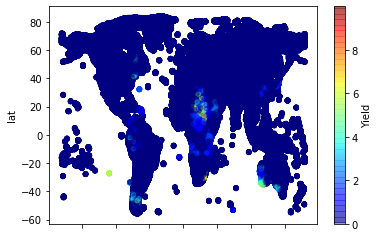

In [13]:
training.plot(kind="scatter", x="lon", y="lat", alpha =0.4,
             c="Yield", cmap=plt.get_cmap("jet"), colorbar=True)


In [38]:
X_train = training.copy().drop(["Yield"],axis=1)
Y_train = training.copy()["Yield"]
X_val = training.copy().drop(["Yield"],axis=1)
Y_val = training.copy()["Yield"]

X_column_names = X_train.columns.values.tolist()


In [28]:
rnd_reg = RandomForestRegressor(n_estimators=500 n_jobs=-1,oob_score=True)
rnd_reg.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=16,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                      oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

Random Forest unable to fit the training set, even with unlimited max_depth and no attempts at regularisation

In [34]:
rnd_reg.score(X_train, Y_train)

0.4029792759894547

So of course, poor out-of-bag scores and poor score on validation set

In [30]:
rnd_reg.oob_score_

0.40210721566433905

In [33]:
rnd_reg.score(X_val, Y_val)

0.4029792759894547

In [39]:
for name, score in zip(X_column_names, rnd_reg.feature_importances_):
    print(name,score)

lat 0.37772742906969003
lon 0.41106693642759057
CDD 0.014676663206270703
CWD 0.19652897129644875
CFD 0.0
